In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import stats
g2p = pd.read_csv('../Resources/genes_to_phenotype.Nov_29_2022.txt',sep='\t',comment='#',header=None)
g2p.columns = ['entrez-gene-id','entrez-gene-symbol','HPO-Term-ID','HPO-Term-Name','Frequency-Raw','Frequency-HPO','Additional Info from G-D source','G-D source','disease-ID for link']
print(g2p.columns)
print(g2p.shape)
#sex_specific_genes
ss_genes = set(['HKDC1','HKDC1','HKDC1','CLDN7','MMP24-AS1','RPS26','RPS26','RPS26','RP11-370B11.3',
            'LRRC36','CAST','NUDT14','NUDT14','TRIM33','RNASET2','FAM53B','FAM53B','FAM53B',
            'FAM53B','FAM53B','FAM53B','RPS10','KRT16','NTN4','NTN4','SNX31','C9orf66','MET','HAGLROS','TRMT112',
            'CCDC125','CCDC125','CCDC125','CCDC125','CCDC125','CCDC125','DPYSL4','DPYSL4','PLEKHA1','PLEKHA1',
            'TUBG2','CHMP3','ORAI2','MCM4','LINC01806','CELSR2','CELSR2','CELSR2','CELSR2','RPS26','RPS26','RPS26',
            'CELSR2','NFKB2','PLEC','PLEC','NOB1','HOXC5','ATP5S','USP30','CRLF3','SFXN2','SFXN2','SFXN2','SFXN2',
            'SHANK3','PRKCB','NAGLU','NAGLU','NAGLU','IL18RAP','CCDC88C','CCDC88C','SOWAHC'])

print(len(ss_genes))

Index(['entrez-gene-id', 'entrez-gene-symbol', 'HPO-Term-ID', 'HPO-Term-Name',
       'Frequency-Raw', 'Frequency-HPO', 'Additional Info from G-D source',
       'G-D source', 'disease-ID for link'],
      dtype='object')
(269994, 9)
42


In [2]:
# distribution of number of annotations per gene
gene_counts_dict = { g:sum(g2p['entrez-gene-symbol'] == g) for g in set(g2p['entrez-gene-symbol'])}
gene_counts = [sum(g2p['entrez-gene-symbol'] == g) for g in set(g2p['entrez-gene-symbol'])]
# gene_counts_dict2 = {}
# for i,g in enumerate(g2p['entrez-gene-symbol']):
#     if i % 1000 == 0:
#         print(i / g2p.shape[0],'%')
#     if g not in gene_counts_dict2:
#         gene_counts_dict2[g] = 0
#     gene_counts_dict2[g] += 1

## Find the 30 or 22

"Only 30 genes (0.23%), 22 of which are known constitutive XCI escapees (table S3), exhibited consistent sex bias across all 44 tissue sources (Fig. 2B)."

https://www.science.org/doi/full/10.1126/science.aba3066#supplementary-materials

In [3]:
xls = pd.ExcelFile('/Users/michael/Downloads/aba3066-table-s2.xlsx')
print(xls.sheet_names)
# go into each sheet, skip the first two since they are not about any tissue
present_in_all = None
for sheet_name in xls.sheet_names[2:]:
    # find all genes that are present in all sheets
#     print(sheet_name)
    xdf = xls.parse(sheet_name)
    if present_in_all is None:
        present_in_all = set(xdf['HUGO_gene_id'])
    else:
        present_in_all = present_in_all.intersection(set(xdf['HUGO_gene_id']))
print(len(present_in_all))
print(present_in_all)
sex_dif_genes_in_all_tissues = present_in_all

sex_dif_genes_in_all_tissues = [x if isinstance(x,str) else 'Missing' for x in sex_dif_genes_in_all_tissues]
sex_dif_genes_in_all_tissues.sort()
print(sex_dif_genes_in_all_tissues)

['README', 'Replication', 'ADPSBQ', 'ADPVSC', 'ADRNLG', 'ARTAORT', 'ARTCRN', 'ARTTBL', 'BRNAMY', 'BRNACC', 'BRNCDT', 'BRNCHB', 'BRNCHA', 'BRNCTXA', 'BRNCTXB', 'BRNHPP', 'BRNHPT', 'BRNNCC', 'BRNPTM', 'BRNSPC', 'BRNSNG', 'BREAST', 'FIBRBLS', 'LCL', 'CLNSGM', 'CLNTRN', 'ESPGEJ', 'ESPMCS', 'ESPMSL', 'HRTAA', 'HRTLV', 'KDNCTX', 'LIVER', 'LUNG', 'SLVRYG', 'MSCLSK', 'NERVET', 'PNCREAS', 'PTTARY', 'SKINNS', 'SKINS', 'SNTTRM', 'SPLEEN', 'STMACH', 'THYROID', 'WHLBLD']
27
{'KDM5C', 'FRG1CP', 'CD99P1', 'MIR4458HG', 'CD99', 'KDM6A', 'ZFX', nan, 'EIF2S3B', 'JPX', 'RPS4X', 'EIF2S3', 'TXLNG', 'EIF1AX', 'SYAP1', 'UBA1', 'SPESP1', 'FRG1BP', 'DDX3X', 'DDX43', 'STS', 'PUDP', 'PNPLA4', 'ZRSR2', 'XIST', 'SMC1A', 'CA5BP1'}
['CA5BP1', 'CD99', 'CD99P1', 'DDX3X', 'DDX43', 'EIF1AX', 'EIF2S3', 'EIF2S3B', 'FRG1BP', 'FRG1CP', 'JPX', 'KDM5C', 'KDM6A', 'MIR4458HG', 'Missing', 'PNPLA4', 'PUDP', 'RPS4X', 'SMC1A', 'SPESP1', 'STS', 'SYAP1', 'TXLNG', 'UBA1', 'XIST', 'ZFX', 'ZRSR2']


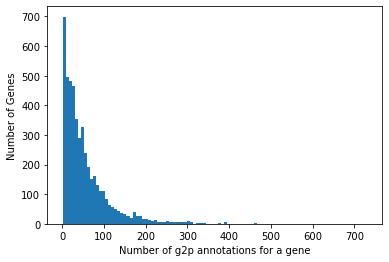

In [4]:
plt.hist(gene_counts,bins=100)
plt.xlabel('Number of g2p annotations for a gene')
plt.ylabel('Number of Genes')
plt.show()

In [5]:
# what are teh number of g2p for the sex_dif_genes_in_all_tissues?
sex_dif_genes_in_all_tissues
sdgat_counts = [gene_counts_dict[x] if x in gene_counts_dict else 0 for x in sex_dif_genes_in_all_tissues]
print(max(sdgat_counts))
max_i = sdgat_counts.index(max(sdgat_counts))
print('Gene with largest number of annotations', sex_dif_genes_in_all_tissues[max_i], )
print('Num 0s:',sdgat_counts.count(0))

for x in sex_dif_genes_in_all_tissues:
    if x in gene_counts_dict:
        print(x, gene_counts_dict[x])

301
Gene with largest number of annotations SMC1A
Num 0s: 19
DDX3X 51
EIF2S3 64
KDM5C 84
KDM6A 175
SMC1A 301
STS 42
UBA1 82
XIST 1


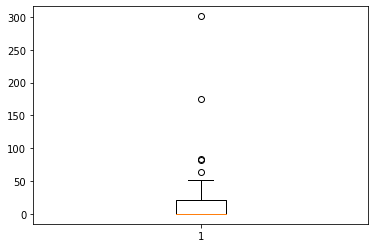

In [6]:
plt.boxplot(sdgat_counts)
plt.show()

In [7]:
p = stats.ttest_ind(sdgat_counts, gene_counts, equal_var=False)
print(p)

p_no_0 = stats.ttest_ind([0 for x in sdgat_counts if x != 0], gene_counts, equal_var=False)
print(p_no_0)

Ttest_indResult(statistic=-1.9499840262248636, pvalue=0.06193980918240975)
Ttest_indResult(statistic=-62.737722298214905, pvalue=0.0)


In the paper Stranger et al. say there are 30 genes that exhibited consistent sex bias across all 44 tissue sources. Looking through table-s2 I found only 27 genes that were listed on all of the tissue tabs (close enough to 30 for me).

19 of these 27 have 0 gene-to-phenotype annotations. 

Comparing these genes' number of annotations to that of all genes there is a p = 0.06. But this list of "all gene" only inlcudes ones with > 0 annotations. So comparing the 8 sex-differentiated genes with > 0 annotations of there is a p = 0.0 (too small for python floats). Honestly the t-test is not that important or meaningful in either way. Most have no way of saying they have more or less than other genes, because they are 0. The ones that do have annotations have significantly more one average, but there are only 8 of them.

One of the genes has 301 annotations, SMC1A (Structural Maintenance Of Chromosomes 1A). 

SMC1A 301 (Structural Maintenance Of Chromosomes 1A)

KDM6A 175 (X chromosome, Kabuki Syndrome)

KDM5C 84 (X-linked cognitive disability)

UBA1 82 (X-linked, catalyzes the first step in ubiquitin conjugation to mark cellular proteins for degradation)

EIF2S3 64 (X, largest subunit of a heterotrimeric GTP-binding protein)

DDX3X 51 (X-Linked, DEAD-box protein, ATP-dependent RNA helicase activity)

STS 42 (X, hydrolyzes several a metabolic precursors for estrogens, androgens, and cholesterol)

XIST 1 (X Inactive Specific Transcript, lncRNA)

In [8]:
# make a plot
# x - number of tissues differentiall expressed in
# y - number of g2p annotations

# count the number of tissues a gene is differentially expressed in
gene_tissue_counts = {}
for sheet_name in xls.sheet_names[2:]:
    xdf = xls.parse(sheet_name)
    for g in xdf['HUGO_gene_id']:
        if g not in gene_tissue_counts:
            gene_tissue_counts[g] = 0
        gene_tissue_counts[g] += 1

# build a df
genes = gene_tissue_counts.keys()
data = {'gene':genes,'tissue_count':[gene_tissue_counts[g] for g in genes],
        'g2p_count':[gene_counts_dict[g] if g in gene_counts_dict else 0 for g in genes]}
df = pd.DataFrame(data)
df['tissue_count'].max()
print(df[df['tissue_count'] == df['tissue_count'].max()])
df = df[df['tissue_count'] < 45]

  gene  tissue_count  g2p_count
6  NaN          1829          0


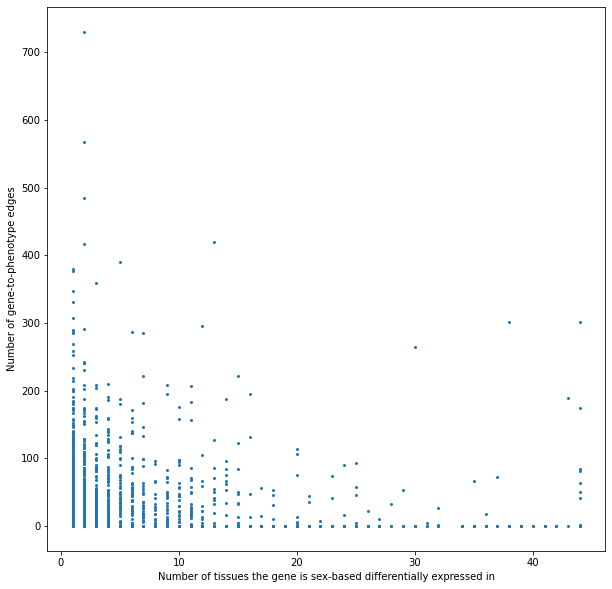

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.scatter(df['tissue_count'], df['g2p_count'],s=4)
ax.set_xlabel('Number of tissues the gene is sex-based differentially expressed in')
ax.set_ylabel('Number of gene-to-phenotype edges')
plt.show()


In [ ]:





print(stats.pearsonr(df['tissue_count'], df['g2p_count']))